In [2]:
# Estimator

In [1]:
#1. Load dependencies
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sweep import config
from SWEEP_estimator import main
print("Imports complete!")

Imports complete!
Imports complete!


## Spatial Query

<Axes: >

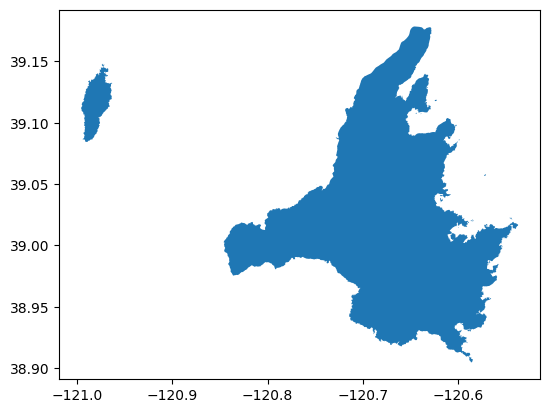

In [3]:
aoi_path = os.path.join(config.demo_dir, "demo_multipoly.shp")
aoi = gpd.read_file(aoi_path)
aoi.plot()

The Estimator uses data from CAL FIRE's damage inspection database to identify structures damaged by wildfire.
It uses parcel and footprint data to esitmate the square footage for each structure.

In [4]:
# Filter spatiallly-- we use two polygon geometries to pull data for known incidents.
# However, SWEEP doesn't automatically know if there are other fires in the region-- using a date filter is advised.
emissions_gdf, agg_table, vehicle_table = main(
    get_mode = "use_default",
    filter_method = "Spatial",
    polygon_input = aoi,
    aggregate_fields=['AIR DISTRICT', 'AOI_INDEX']
    )
print("Complete!")

Loading BSDB using use_default...
Loading BSDB using use_default...


Applying filter criteria...
No date filter applied.
Reprojecting polygon from EPSG:4326 to EPSG:3310.
451 rows after spatial filtering with   fire_name    incident_n start_date                          group_id fp_source                                           geometry
0  Mosquito  CATNF 001371 2022-09-06  Mosquito_CATNF 001371_2022-09-06      FRAP  MULTIPOLYGON (((-120.56853 38.98437, -120.5686...
1     River  CANEU 020628 2021-08-04     River_CANEU 020628_2021-08-04      FRAP  POLYGON ((-120.99035 39.0844, -120.99116 39.08....
Estimating emissions for pollutants: ['CO', 'NOx', 'SOx', 'PM', 'TOG']...
C:\Users\gstarrs\Projects\CARB\sweep_test\data\emissions_factors
Holder efs from: C:\Users\gstarrs\Projects\CARB\sweep_test\data\emissions_factors\Holder_EFs.xlsx
Requested pollutants: ['CO', 'NOx', 'SOx', 'PM', 'TOG']
Applying filter criteria...
No date filter applied.
Reprojecting polygon from EPSG:4326 to EPSG:3310.
451 rows after spatial filtering with   fire_name    incident_n star

Returned pollutants: ['CO' 'NOx' 'SOx' 'PM' 'TOG']
Aggregating report by: ['AIR DISTRICT', 'AOI_INDEX']...
Aggregating on: ['AIR DISTRICT', 'AOI_INDEX']
Calculating vehicle emissions with CARB factors...
216
Ratio provided: 311.03999999999996 vehicles estimated using ratio: 1.44
CARB efs from: C:\Users\gstarrs\Projects\CARB\sweep_test\data\emissions_factors\CARB_EFs.xlsx
Requested pollutants: ['CO', 'NOx', 'SOx', 'PM']
Returned pollutants: ['CO' 'NOx' 'SOx' 'PM']
Writing Emissions Report to C:\Users\gstarrs\Projects\CARB\sweep_test\outputs\SWEEP_20250610_133523\Emissions_Report.xlsx
Writing Aggregated Report to C:\Users\gstarrs\Projects\CARB\sweep_test\outputs\SWEEP_20250610_133523\Aggregated_Report.xlsx
Writing Vehicle Report to C:\Users\gstarrs\Projects\CARB\sweep_test\outputs\SWEEP_20250610_133523\Vehicle_Report.xlsx
Returned pollutants: ['CO' 'NOx' 'SOx' 'PM' 'TOG']
Aggregating report by: ['AIR DISTRICT', 'AOI_INDEX']...
Aggregating on: ['AIR DISTRICT', 'AOI_INDEX']
Calculating veh

Spatial data written to C:\Users\gstarrs\Projects\CARB\sweep_test\outputs\SWEEP_20250610_133523\Emissions_Spatial.gpkg
running...
Spatial data written to C:\Users\gstarrs\Projects\CARB\sweep_test\outputs\SWEEP_20250610_133523\Emissions_Spatial.gpkg
running...


In [7]:
# In the returned dataframes, columns from the aoi_source are retained and tagged with "AOI" at the start of the column.
# predicted_emissions_gdf is a geodataframe of each record used to estimate emissions.
# These are parcels that fell within the AOI and were populated with data for living squarefootage.
print(emissions_gdf.crs)
emissions_gdf.head(5)

EPSG:3310
EPSG:3310


,AOI_FIRE_NAME,AOI_INCIDENT_N,AOI_START_DATE,AOI_GROUP_ID,AOI_FP_SOURCE,AOI_INDEX,INCIDENTNAME,INCIDENTNUM,START_DATE,GLOBALID_DINS,DAMAGE,STRUCTURETYPE,STRUCTURECATEGORY,CAT,SQFT,SQFT_SOURCE,COUNTY,AIR_BASIN,AIR_DISTRICT,COABDIS,CONSUMPTION_FACTOR,FRAME_FACTOR,CONTENTS_FACTOR,geometry,E_CO_TN,E_NOX_TN,E_SOX_TN,E_PM_TN,E_TOG_TN,MONTH,YEAR
60130,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP,1,River,CANEU 020628,2021-08-04,{5A6B63E7-0584-4A3D-9566-D1BED0D23610},Destroyed (>50%),Single Family Residence Single Story,Single Residence,SFSS,1458.0,MEDIAN,Placer,MOUNTAIN COUNTIES,Placer,31_MC_PLA,0.95,31.07,5.87,POINT (-84115.053 121871.211),1.765,0.008,0.002,1.005,0.073,8,2021
60132,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP,1,River,CANEU 020628,2021-08-04,{28A405D3-B735-4C6A-9030-5DB781554E63},Destroyed (>50%),Single Family Residence Single Story,Single Residence,SFSS,1458.0,MEDIAN,Placer,MOUNTAIN COUNTIES,Placer,31_MC_PLA,0.95,31.07,5.87,POINT (-84075.412 121847.802),1.765,0.008,0.002,1.005,0.073,8,2021
60133,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP,1,River,CANEU 020628,2021-08-04,{A8436F57-068C-4D19-B659-48B51EE6DCA0},Destroyed (>50%),Single Family Residence Single Story,Single Residence,SFSS,1458.0,MEDIAN,Placer,MOUNTAIN COUNTIES,Placer,31_MC_PLA,0.95,31.07,5.87,POINT (-84093.56 121769.283),1.765,0.008,0.002,1.005,0.073,8,2021
60135,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP,1,River,CANEU 020628,2021-08-04,{18869BDE-69CE-4F93-B844-2F9C416A57CD},No Damage,Single Family Residence Single Story,Single Residence,SFSS,2411.0,PARCEL,Placer,MOUNTAIN COUNTIES,Placer,31_MC_PLA,0.00,31.07,5.87,POINT (-84135.956 121591.938),0.000,0.000,0.000,0.000,0.000,8,2021
60136,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP,1,River,CANEU 020628,2021-08-04,{84EC24BE-B097-4FB8-8287-406BB9929E4F},Destroyed (>50%),Single Family Residence Single Story,Single Residence,SFSS,1458.0,MEDIAN,Placer,MOUNTAIN COUNTIES,Placer,31_MC_PLA,0.95,31.07,5.87,POINT (-83735.224 122402.04),1.765,0.008,0.002,1.005,0.073,8,2021


<Axes: >

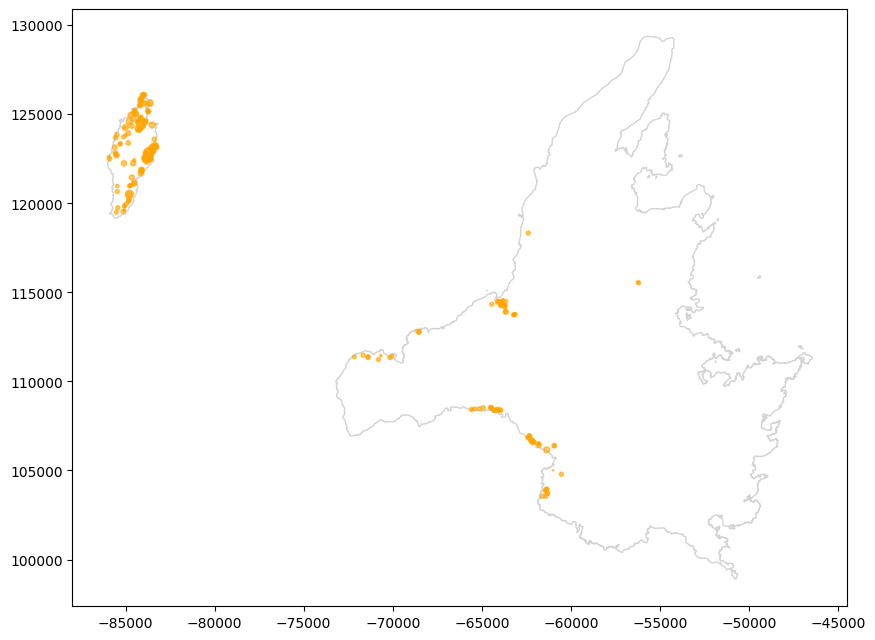

In [8]:
# Read AOI layer
aoi = gpd.read_file(aoi_path)
aoi_gdf = aoi.to_crs(emissions_gdf.crs)

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot AOI in light gray
aoi_gdf.plot(ax=ax, color='none', edgecolor='lightgray', linewidth=1)

# Compute marker sizes based on E_CO_TN (adjust scaling factor as needed)
sizes = emissions_gdf["E_CO_TN"].fillna(0) * 5

# Plot predicted emissions with symbol size proportional to E_CO_TN
emissions_gdf.plot(
    ax=ax,
    color='orange',
    alpha=0.6,
    markersize=sizes
)

In [9]:
# In this demo run, we provided "AIR DISTRICT" and "AOI_INDEX" as the aggregation fields.
# As you can see our results are split by AOI_INDEX (the polygon) and AIR_DISTRICT.
# We get total emissions for each polygon in each air district.

agg_table.head()

,AIR_DISTRICT,AOI_INDEX,E_CO_TN,E_NOX_TN,E_SOX_TN,E_PM_TN,E_TOG_TN,DAMAGED_STRUCTURES
0,El Dorado,0,70.53,0.33,0.07,40.17,2.92,40
1,Northern Sierra,1,150.28,0.71,0.14,85.59,6.22,79
2,Placer,0,55.88,0.26,0.05,31.82,2.32,37
3,Placer,1,129.24,0.61,0.12,73.60,5.35,62


In [10]:
# We can use the full dataframe to add other AOI attributes back in:
aoi_cols = [col for col in emissions_gdf.columns if col.startswith("AOI_")]

# 2. Drop duplicates to get unique AOI records
unique_aoi = emissions_gdf[aoi_cols].drop_duplicates()

# 3. Merge with agg_table on AOI_INDEX
agg_table_aoi = agg_table.merge(unique_aoi, on="AOI_INDEX", how="left")
agg_table_aoi.head()

,AIR_DISTRICT,AOI_INDEX,E_CO_TN,E_NOX_TN,E_SOX_TN,E_PM_TN,E_TOG_TN,DAMAGED_STRUCTURES,AOI_FIRE_NAME,AOI_INCIDENT_N,AOI_START_DATE,AOI_GROUP_ID,AOI_FP_SOURCE
0,El Dorado,0,70.53,0.33,0.07,40.17,2.92,40,Mosquito,CATNF 001371,2022-09-06,Mosquito_CATNF 001371_2022-09-06,FRAP
1,Northern Sierra,1,150.28,0.71,0.14,85.59,6.22,79,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP
2,Placer,0,55.88,0.26,0.05,31.82,2.32,37,Mosquito,CATNF 001371,2022-09-06,Mosquito_CATNF 001371_2022-09-06,FRAP
3,Placer,1,129.24,0.61,0.12,73.60,5.35,62,River,CANEU 020628,2021-08-04,River_CANEU 020628_2021-08-04,FRAP


## Automated query

In [16]:
# Filter spatiallly-- we use two polygon geometries to pull data for known incidents.
# However, SWEEP doesn't automatically know if there are other fires in the region-- using a date filter is advised.
emissions_gdf_auto, agg_table_auto, vehicle_table_auto = main(
    get_mode = "use_default",
    filter_method = "automated",
    filter_field = "Air Basin",
    field_values = ["MOUNTAIN COUNTIES", "SAN JOAQUIN VALLEY"],
    apply_date_filter = True,
    start_date = "2018-01-01",
    end_date = "2021-01-01",
    aggregate_fields=['AIR DISTRICT', 'YEAR', 'INCIDENT'],
    write = "No"
    )
print("Complete!")

Loading BSDB using use_default...
Loading BSDB using use_default...


Applying filter criteria...
59137 rows after date filtering from 2018-01-01 to 2021-01-01.
4501 rows after filtering by Air Basin: ['MOUNTAIN COUNTIES', 'SAN JOAQUIN VALLEY'].
Estimating emissions for pollutants: ['CO', 'NOx', 'SOx', 'PM', 'TOG']...
C:\Users\gstarrs\Projects\CARB\sweep_test\data\emissions_factors
Applying filter criteria...
59137 rows after date filtering from 2018-01-01 to 2021-01-01.
4501 rows after filtering by Air Basin: ['MOUNTAIN COUNTIES', 'SAN JOAQUIN VALLEY'].
Estimating emissions for pollutants: ['CO', 'NOx', 'SOx', 'PM', 'TOG']...
C:\Users\gstarrs\Projects\CARB\sweep_test\data\emissions_factors


Holder efs from: C:\Users\gstarrs\Projects\CARB\sweep_test\data\emissions_factors\Holder_EFs.xlsx
Requested pollutants: ['CO', 'NOx', 'SOx', 'PM', 'TOG']
Returned pollutants: ['CO' 'NOx' 'SOx' 'PM' 'TOG']
Aggregating report by: ['AIR DISTRICT', 'YEAR', 'INCIDENT']...
Aggregating on: ['AIR DISTRICT', 'YEAR', 'INCIDENT']
Calculating vehicle emissions with CARB factors...
1207
Ratio provided: 1738.08 vehicles estimated using ratio: 1.44
CARB efs from: C:\Users\gstarrs\Projects\CARB\sweep_test\data\emissions_factors\CARB_EFs.xlsx
Requested pollutants: ['CO', 'NOx', 'SOx', 'PM']
Returned pollutants: ['CO' 'NOx' 'SOx' 'PM']
Complete!
Holder efs from: C:\Users\gstarrs\Projects\CARB\sweep_test\data\emissions_factors\Holder_EFs.xlsx
Requested pollutants: ['CO', 'NOx', 'SOx', 'PM', 'TOG']
Returned pollutants: ['CO' 'NOx' 'SOx' 'PM' 'TOG']
Aggregating report by: ['AIR DISTRICT', 'YEAR', 'INCIDENT']...
Aggregating on: ['AIR DISTRICT', 'YEAR', 'INCIDENT']
Calculating vehicle emissions with CARB fac

In [14]:
emissions_gdf_auto.head()

,INCIDENTNAME,INCIDENTNUM,START_DATE,GLOBALID_DINS,DAMAGE,STRUCTURETYPE,STRUCTURECATEGORY,CAT,SQFT,SQFT_SOURCE,COUNTY,AIR_BASIN,AIR_DISTRICT,COABDIS,CONSUMPTION_FACTOR,FRAME_FACTOR,CONTENTS_FACTOR,geometry,E_CO_TN,E_NOX_TN,E_SOX_TN,E_PM_TN,E_TOG_TN,MONTH,YEAR
456,Wagner,CAMMU 016004,2018-08-04,{CA9382AF-9449-4988-98CE-C00CE3C55B32},Destroyed (>50%),Single Family Residence Single Story,Single Residence,SFSS,1458.000000,MEDIAN,Mariposa,MOUNTAIN COUNTIES,Mariposa,22_MC_MPA,0.95,31.07,5.87,POINT (-9578.918 -33825.916),1.765,0.008,0.002,1.005,0.073,8,2018
1286,Frazier,CAFKU 007893,2018-06-03,{1765CBC6-51CC-4A19-883C-1F5509FC5A3F},Minor (10-25%),Single Family Residence Single Story,Single Residence,SFSS,1752.000000,PARCEL,Fresno,SAN JOAQUIN VALLEY,San Joaquin Valley Unified,10_SJV_SJU,0.00,31.07,5.87,POINT (43612.19 -105244.953),0.000,0.000,0.000,0.000,0.000,6,2018
1304,Omega,CAAEU 021770,2018-08-01,{39799A65-7A77-4BC3-BFD6-B042F640C830},No Damage,Single Family Residence Single Story,Single Residence,SFSS,1391.000000,PARCEL,El Dorado,MOUNTAIN COUNTIES,El Dorado,9_MC_ED,0.00,31.07,5.87,POINT (-89600.032 90657.664),0.000,0.000,0.000,0.000,0.000,8,2018
1305,Omega,CAAEU 021770,2018-08-01,{92C931E6-9D5F-47B5-B82B-968E7AAA02D8},Minor (10-25%),Single Family Residence Single Story,Single Residence,SFSS,1777.000000,PARCEL,El Dorado,MOUNTAIN COUNTIES,El Dorado,9_MC_ED,0.00,31.07,5.87,POINT (-89674.345 90491.003),0.000,0.000,0.000,0.000,0.000,8,2018
1306,Omega,CAAEU 021770,2018-08-01,{288E3A2E-03B8-4FA3-9A05-85503FBC3A4C},Minor (10-25%),Single Family Residence Single Story,Single Residence,SFSS,1666.421397,MODEL_A,El Dorado,MOUNTAIN COUNTIES,El Dorado,9_MC_ED,0.00,31.07,5.87,POINT (-89807.299 90485.001),0.000,0.000,0.000,0.000,0.000,8,2018


In [17]:
agg_table_auto

,AIR_DISTRICT,YEAR,INCIDENTNAME,E_CO_TN,E_NOX_TN,E_SOX_TN,E_PM_TN,E_TOG_TN,DAMAGED_STRUCTURES
0,Amador,2018,Irish,1.77,0.01,0.00,1.01,0.07,1.0
1,Amador,2019,Willow,1.76,0.01,0.00,1.00,0.07,1.0
2,Calaveras,2018,Horse,3.38,0.02,0.00,1.93,0.14,2.0
3,Calaveras,2018,Waverly,1.98,0.01,0.00,1.13,0.08,1.0
4,El Dorado,2018,Meyers,7.65,0.04,0.01,4.36,0.32,4.0
5,El Dorado,2018,Omega,1.66,0.01,0.00,0.94,0.07,1.0
6,El Dorado,2019,County,2.91,0.01,0.00,1.66,0.12,2.0
7,El Dorado,2019,Rimrock,1.76,0.01,0.00,1.00,0.07,1.0
8,El Dorado,2020,Cameron,3.37,0.02,0.00,1.92,0.14,2.0
9,Mariposa,2018,Wagner,16.10,0.08,0.02,9.17,0.67,7.0
